In [1]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv("hosteldata.csv")
df.head()

,Hid,HostelName,District,Place/City,HostelType,ManagerName,ManagerContact,SingleSeater,DoubleSeater,3Seater,4Seater,Ratings,Facilities,Description,Wifi,HotWater,Parking,Laundry,CCTV,Fan
0,1,Big Bell Boys Hostel,Bhaktapur,Tibukche Tol,Boys,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,3.0,"Wifi, Hot and Cold Water, Parking, Laundary, C...",This hostel has peacful environment,True,True,True,True,True,True
1,2,Friends Boys Hostel,Bhaktapur,Dokchee,Boys,Sujeet Raut,9.812038e+09,11000,10000,9000,8000,2.0,"Wifi, Hot and Cold Water, Parking, Laundary, Fan",This hostel has peacful environment,True,True,True,True,True,True
2,3,Golden Gate Boys Hostel,Bhaktapur,Talako,Boys,Sujeet Raut,9.812038e+09,13000,12000,11000,10000,4.0,"Wifi, Hot and Cold Water, Laundary, CCTV, Gym,...",This hostel has peacful environment,True,True,True,True,True,True
3,4,Ajima Girls Hostel,Bhaktapur,Ghakha,Girls,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,5.0,"Wifi, Hot and Cold Water, Parking, CCTV, Gym",This hostel has peacful environment,True,True,True,True,True,True
4,5,Manjushree Girls Hostel,Bhaktapur,Dudhpati,Girls,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,1.0,"Wifi, Hot and Cold Water, Parking",This hostel has peacful environment,True,True,True,True,True,True


In [4]:
#Process data by creating feature matrix for training set and testing set

train_data, test_data = train_test_split(df, test_size=0.4, random_state=42)

In [31]:
features = ["HostelName", "District", "Place/City", "HostelType", "SingleSeater", "DoubleSeater", "3Seater", "4Seater", "Wifi",
            "HotWater", "Parking", "Laundry", "CCTV", "Fan"]


all_features_train = []
for index, row in train_data.iterrows():
    hostel_features = []
    for feature in features:
        hostel_features.append(row[feature])
    hostel_features = [str(feature) for feature in hostel_features]
    all_features_train.append(" ".join(hostel_features))

all_features_test = []
for index, row in test_data.iterrows():
  hostel_features = []
  for feature in features:
    hostel_features.append(row[feature])
  hostel_features = [str(feature) for feature in hostel_features]
  all_features_test.append(" ".join(hostel_features))    
    

vectorizer = TfidfVectorizer()
feature_matrix_train = vectorizer.fit_transform(all_features_train)
feature_matrix_test = vectorizer.transform(all_features_test)


In [32]:
# Use TfidfVectorizer to convert the input into a matrix of token counts
input_features = ["HostelName", "District", "Place/City", "HostelType", "SingleSeater", "DoubleSeater", "3Seater", "4Seater", "Wifi",
            "HotWater", "Parking", "Laundry", "CCTV", "Fan"]
input_features_str = " ".join(str(feature) for feature in input_features)
input_matrix = vectorizer.transform([input_features_str])


In [33]:
#Train the recommendation algorithm on train data

def get_recommendations(HostelName, District, Place_City, HostelType, SingleSeater, DoubleSeater, ThreeSeater, FourSeater, Wifi,
                        HotWater, Parking, Laundry, CCTV, Fan):
    # Convert the booleans to strings
    Wifi = str(Wifi)
    HotWater = str(HotWater)
    Parking = str(Parking)
    Laundry = str(Laundry)
    CCTV = str(CCTV)
    Fan = str(Fan)

    # Calculate the cosine similarity between the input and all hostels
    similarity = cosine_similarity(input_matrix, feature_matrix_train)

    # Get the indices of the most similar hostels
    most_similar = similarity.argsort()[:, ::-1]
    #   print(most_similar)
    # Return a list of the most similar hostels
    return train_data.iloc[most_similar[0][:5]]

In [34]:
get_recommendations(HostelName='Big Bell Boys Hostel ', District='Bhaktapur', Place_City='Tibukche', HostelType='Boys',SingleSeater='0', 
                    DoubleSeater='0', ThreeSeater='0', FourSeater='9000', Wifi=[True],
                        HotWater=[False], Parking=[True], Laundry=[True], CCTV=[True], Fan=[False])

,Hid,HostelName,District,Place/City,HostelType,ManagerName,ManagerContact,SingleSeater,DoubleSeater,3Seater,4Seater,Ratings,Facilities,Description,Wifi,HotWater,Parking,Laundry,CCTV,Fan
102,103,Mukesh Boys Hostel,Kathmandu,Koteshwor,Boys,NaN,NaN,13000,12000,11000,10000,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, Fan",NaN,True,True,True,True,True,True
11,12,Planet Bhaktapur Boys Hostel,Bhaktapur,Mandev Marga Jhaukhel Vdc,Boys,Sujeet Raut,9.812038e+09,12000,11000,10000,9000,4.0,"Wifi, Hot and Cold Water, Parking, Laundary, CCTV",This hostel has peacful environment,True,True,True,False,True,False
173,174,Sachin Boys Hostel,Lalitpur,Pulchwok,Boys,NaN,NaN,12500,11500,10500,9500,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, CCTV",NaN,True,True,True,True,True,False
32,33,Patan Kumari hostel,Lalitpur,Lagankhel,Girls,Buddha Singh Subba,NaN,12000,11000,10000,9000,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, C...",NaN,True,False,True,True,True,False
122,123,Shankar Boys Hostel,Kathmandu,Buddhanagar,Boys,NaN,NaN,13000,12000,11000,10000,NaN,"Wifi, Hot and Cold Water, Parking, Laundary, C...",NaN,True,True,True,True,True,True


In [35]:
def get_recommendations(test_data):
    all_features_test = []
    for index, row in test_data.iterrows():
        hostel_features = []
        for feature in features:
            hostel_features.append(row[feature])
        hostel_features = [str(feature) for feature in hostel_features]
        all_features_test.append(" ".join(hostel_features))
    feature_matrix_test = vectorizer.transform(all_features_test)
    similarity = cosine_similarity(feature_matrix_test, feature_matrix_train)
    recommendations = []
    for i in range(similarity.shape[0]):
        # Get the indices of the most similar hostels
        most_similar = similarity[i].argsort()[::-1]
        # Return a list of the most similar hostels
        recommendations.append(train_data.iloc[most_similar[:5]])
    return recommendations


In [36]:
recommendations = get_recommendations(test_data)


Accuracy: 0.8303571428571429
Precision: 0.7642195767195766
Recall: 0.8303571428571429
F1 score: 0.7939139941690962


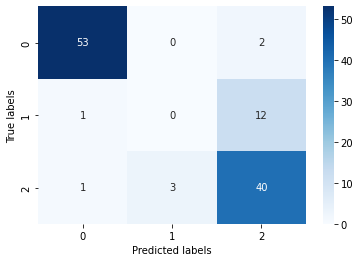

In [19]:
#list of true labels and predicted labels
true_labels = []
predicted_labels = []

for i, recommendation in enumerate(recommendations):
    true_labels.append(test_data.iloc[i]['HostelType'])
    predicted_labels.append(recommendation['HostelType'].value_counts().index[0])
    
# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

#confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities for each class
probs = cosine_similarity(feature_matrix_test, feature_matrix_train)

# Calculate precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(true_labels, probs[:,1])
pr_auc = auc(recall, precision)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported